
Comparison DataFrame:

                  Metric  League Average Will Vest
0            brl_percent        8.271920       4.3
1                 brl_pa        5.619771       2.8
2          avg_hit_angle       13.405444       6.1
3  anglesweetspotpercent       33.667908      24.7


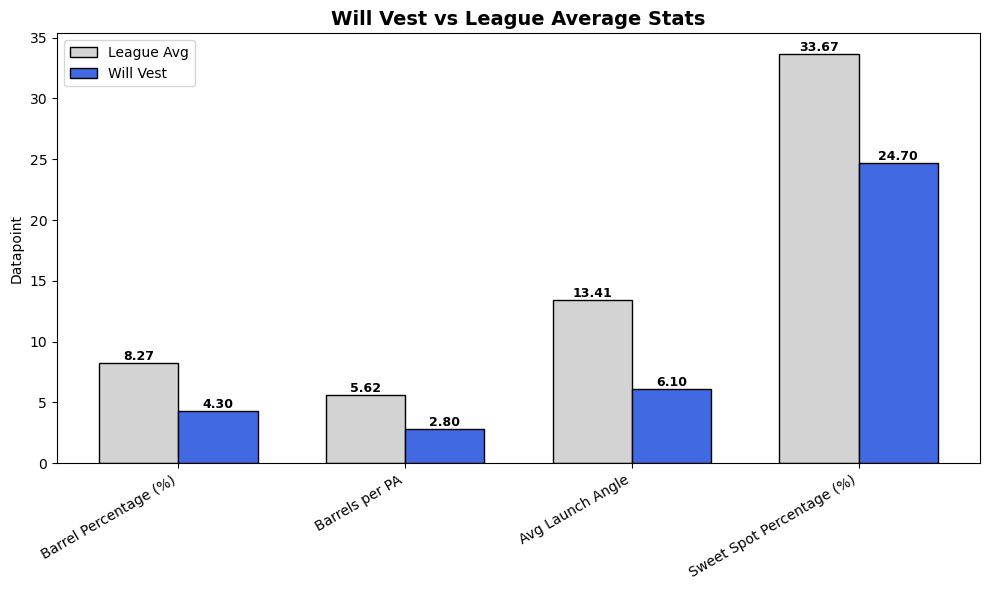

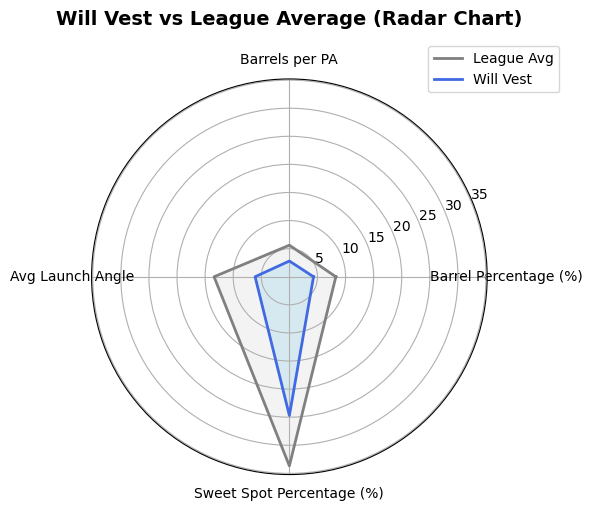

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# Step 1: Load CSV
# ---------------------------
file_path = "data/exit_velocity.csv"
df = pd.read_csv(file_path)

# ---------------------------
# Step 2: Define stats of interest
# ---------------------------
stats_to_compare = [
    "brl_percent",          # barrel %
    "brl_pa",               # barrel on contact per plate appearance
    "avg_hit_angle",        # average angle on contact on a hit
    "anglesweetspotpercent" # sweet spot %
]

# ---------------------------
# Step 3: Compute league averages
# ---------------------------
league_avg = df[stats_to_compare].mean()

# ---------------------------
# Step 4: Select Will Vest
# ---------------------------
player_name = "Vest, Will"

# Some CSVs may split first/last name differently — adjust as needed
player_row = df[
    (df["last_name, first_name"].str.lower() == player_name.lower())
]

if player_row.empty:
    raise ValueError("Could not find Will Vest in this dataset!")

player_stats = player_row.iloc[0][stats_to_compare]

# Combine into one DataFrame for easy reference
comparison_df = pd.DataFrame({
    "Metric": stats_to_compare,
    "League Average": league_avg.values,
    "Will Vest": player_stats.values
})

print("\nComparison DataFrame:\n")
print(comparison_df)

# ---------------------------
# Step 5: Bar Chart (side-by-side with values)
# ---------------------------
x = np.arange(len(stats_to_compare))
bar_width = 0.35

# Custom display labels for x-axis
display_labels = [
    "Barrel Percentage (%)", 
    "Barrels per PA", 
    "Avg Launch Angle", 
    "Sweet Spot Percentage (%)"
]

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - bar_width/2, comparison_df["League Average"], bar_width,
               label="League Avg", color="lightgray", edgecolor="black")
bars2 = ax.bar(x + bar_width/2, comparison_df["Will Vest"], bar_width,
               label="Will Vest", color="royalblue", edgecolor="black")

# Add labels above bars
for bar in list(bars1) + list(bars2):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}",
            ha="center", va="bottom", fontsize=9, fontweight="bold")

# Apply the manual x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(display_labels, rotation=30, ha="right")

ax.set_ylabel("Datapoint")
ax.set_title("Will Vest vs League Average Stats", fontsize=14, fontweight="bold")
ax.legend()
plt.tight_layout()
plt.show()

# ---------------------------
# Step 6: Radar Chart (overlay comparison)
# ---------------------------
def radar_chart_compare(player_vals, league_vals, labels, title="Radar Chart Comparison"):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Close the circle
    player_vals = player_vals.tolist() + player_vals.tolist()[:1]
    league_vals = league_vals.tolist() + league_vals.tolist()[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, league_vals, color="gray", linewidth=2, label="League Avg")
    ax.fill(angles, league_vals, color="lightgray", alpha=0.25)
    ax.plot(angles, player_vals, color="royalblue", linewidth=2, label="Will Vest")
    ax.fill(angles, player_vals, color="skyblue", alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_title(title, fontsize=14, fontweight="bold", pad=20)
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
    plt.tight_layout()
    plt.show()

# Use same display labels for radar chart
radar_chart_compare(
    player_stats.values,
    league_avg.values,
    display_labels,
    title="Will Vest vs League Average (Radar Chart)"
)
